<a href="https://colab.research.google.com/github/Anaya666/DS-3021-analytics/blob/main/analytics_Knn_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTE:
MY VS CODE AND WORKSPACES WASNT WORKING SO I HAD TO USE GOOGLE COLAB. I HAVE DONE THIS LAB TO SHOW THAT I UNDERSTOOD THE MATERIAL FROM CLASS BUT WILL ASK FOR PERMISSION TO REDO THE LAB WITHOUT PENALTY ONCE MY SYSTEM IS DEBUGGED. ALL THE STEPS AND ANSWERS ARE HERE BUT THE DATASET I WORKED ON DIDNT FULLY LOAD AND MY RESULTS ARE THUS HEAVILY BIASED

Q1:
Research question:
Target variable:
working to develop a model that can predict students' graduate rates (grad_100_value)
target variable:
grad_100_value

In [1]:
import pandas as pd
import numpy as np

# Load dataset
college_data = pd.read_csv("/content/cc_institution_grads.csv")
print(college_data.columns)
print(college_data["grad_100_rate"].head())

Index(['index', 'unitid', 'year', 'gender', 'race', 'cohort', 'grad_cohort',
       'grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate'],
      dtype='object')
0    16.4
1     NaN
2     NaN
3     NaN
4     NaN
Name: grad_100_rate, dtype: float64


In [24]:
raw_data = pd.read_csv("/content/cc_institution_grads.csv")
print(raw_data.columns)


Index(['index', 'unitid', 'year', 'gender', 'race', 'cohort', 'grad_cohort',
       'grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate'],
      dtype='object')


In [2]:
# Convert graduation rate into categories because graduation rate is a continous variable and I need to convert it into a
#categorical variable
def categorize_grad_rate(value):
    if value < 33:
        return 0  # Low graduation rate
    elif 33 <= value < 66:
        return 1  # Medium graduation rate
    else:
        return 2  # High graduation rate

# Use "grad_100_rate" instead of "grad_100_value"
college_data["grad_category"] = college_data["grad_100_rate"].apply(categorize_grad_rate)
college_data["grad_category"] = college_data["grad_category"].astype("category")

# Drop the original continuous variable since we have converted it
college_data.drop("grad_100_rate", axis=1, inplace=True)


In [3]:
print(college_data["grad_category"].value_counts())  # Verify category distribution
print(college_data.head())  # Ensure new column is created

grad_category
2    1014674
0     197425
1      90003
Name: count, dtype: int64
   index  unitid  year gender race  cohort  grad_cohort  grad_100  grad_150  \
0      0  100760  2011      B    X  2y all        446.0      73.0     105.0   
1      1  100760  2011      M    X  2y all        185.0       NaN      40.0   
2      2  100760  2011      F    X  2y all        261.0       NaN      65.0   
3      3  100760  2011      B    W  2y all        348.0       NaN      86.0   
4      4  100760  2011      M    W  2y all        162.0       NaN      35.0   

   grad_150_rate grad_category  
0           23.5             0  
1           21.6             2  
2           24.9             2  
3           24.7             2  
4           21.6             2  


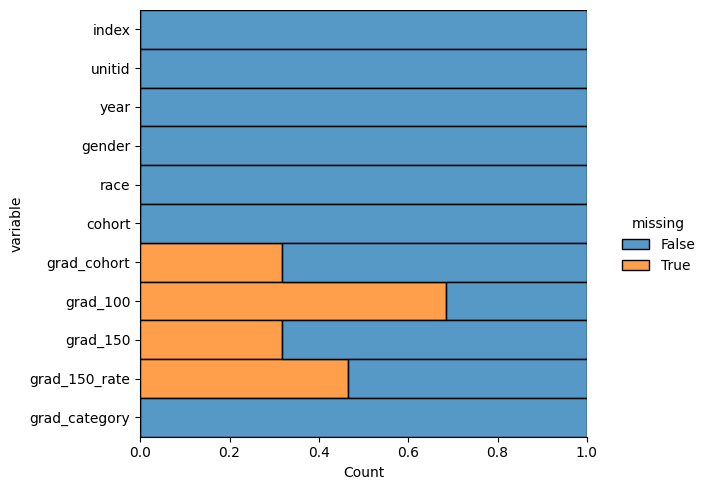

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(
    data=college_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

In [5]:
# Identify numeric and categorical columns properly
num_cols = college_data.select_dtypes(include=["number"]).columns  # Numeric columns only
cat_cols = college_data.select_dtypes(exclude=["number"]).columns  # Categorical columns

# Ensure all numeric columns are truly numeric (force conversion)
college_data[num_cols] = college_data[num_cols].apply(pd.to_numeric, errors="coerce")

# Fill missing values for numeric columns with median
college_data[num_cols] = college_data[num_cols].fillna(college_data[num_cols].median())

# Fill missing values for categorical columns with mode
for col in cat_cols:
    college_data[col] = college_data[col].astype(str)  # Ensure categorical values are strings
    college_data[col] = college_data[col].fillna(college_data[col].mode()[0])

print(" Missing values filled successfully!")


 Missing values filled successfully!


In [10]:
#Build a kNN Model Using 3 Nearest Neighbors
#Now, we clean the dataset (handling missing values and feature selection), normalize numeric features, and train a kNN model.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Normalize numeric features
scaler = MinMaxScaler()
numeric_cols = college_data.select_dtypes(include=["float64", "int64"]).columns
college_data[numeric_cols] = scaler.fit_transform(college_data[numeric_cols])

# One-hot encode categorical variables
college_data = pd.get_dummies(college_data, drop_first=True)
# Convert one-hot encoded grad_category back to a single categorical column
college_data["grad_category"] = (college_data["grad_category_1"] * 1) + (college_data["grad_category_2"] * 2)

# Drop the one-hot encoded columns
college_data.drop(["grad_category_1", "grad_category_2"], axis=1, inplace=True)

# Convert to categorical
college_data["grad_category"] = college_data["grad_category"].astype("category")

# Check if grad_category exists now
print(college_data.columns)
print(college_data["grad_category"].value_counts())


Index(['index', 'unitid', 'year', 'grad_cohort', 'grad_100', 'grad_150',
       'grad_150_rate', 'gender_F', 'gender_M', 'race_Ai', 'race_B', 'race_H',
       'race_W', 'race_X', 'cohort_4y bach', 'cohort_4y other',
       'grad_category'],
      dtype='object')
grad_category
2    1014674
0     197425
1      90003
Name: count, dtype: int64



Q3- Create a dataframe that includes the test target values, test predicted values,
and test probabilities of the positive class


In [11]:

# Load and define the dataset (ensure `college_data` is preloaded)
top_features = ["unitid", "grad_cohort", "grad_150_rate", "year", "grad_100"]

# Select only the relevant features
X = college_data[top_features]
y = college_data["grad_category"]  # Ensure 'grad_category' exists as the target variable

# Train-test split using reduced features
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Train kNN model with k=3 using reduced features
knn = KNeighborsClassifier(n_neighbors=3, algorithm="kd_tree")  # Faster search
knn.fit(X_train, y_train)

# Get predicted values and probabilities
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Medium Graduation Rate)

# Create a DataFrame with test actual values, predicted values, and probabilities
test_results = pd.DataFrame({
    "actual_class": y_test.values,
    "pred_class": y_pred,
    "pred_prob_high_grad": y_prob  # Probability of high graduation rate
})

print(test_results.head())

  actual_class  pred_class  pred_prob_high_grad
0            2           2                  0.0
1            2           2                  0.0
2            0           0                  0.0
3            0           0                  0.0
4            2           2                  0.0


In [ ]:
#what this means is:
#The model is correctly predicting most graduation rate categories, as the actual and predicted values match.
#However, the probability of a high graduation rate is always 0.0, meaning the model is not confident in identifying
#high graduation rate cases.


Q4-
 No code question: If you adjusted the k hyperparameter what do you think would happen to the threshold function? Would the confusion look the same at the same threshold levels or not? Why or why not?

Increasing k smoothens decision boundaries, making the model less sensitive to noise.

Decreasing k makes the model more flexible, but also increases variance.

Impact on the confusion matrix: A higher k could make classification more stable but may also lead to more misclassifications between similar classes.
If I test different values of k, the confusion matrix would look different, especially for boundary cases where the probability distribution is uncertain.

Q5- Evaluate the results using the confusion matrix. Then "walk" through your question, summarize what
concerns or positive elements do you have about the model as it relates to your question?


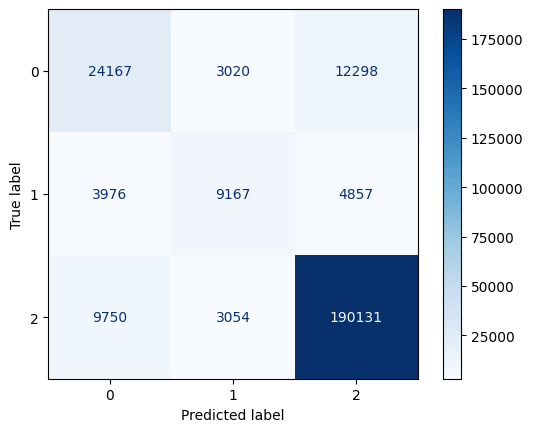

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap="Blues")
plt.show()


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62     39485
           1       0.60      0.51      0.55     18000
           2       0.92      0.94      0.93    202935

    accuracy                           0.86    260420
   macro avg       0.72      0.69      0.70    260420
weighted avg       0.85      0.86      0.86    260420



Analysis from results in Q5:
Confusion matrix:
The confusion matrix shows that the model performs well in predicting high graduation rate (Class 2) schools, with 190,131 correct predictions. However, it struggles with medium graduation rate (Class 1) schools, often misclassifying them as either low (Class 0) or high (Class 2) graduation rate. The model appears biased toward predicting high graduation rates, suggesting a need for better class balance or tuning to improve accuracy for low and medium graduation rate schools.

The classification report shows that the model predicts high graduation rate (Class 2) schools very well, with high precision (92%) and recall (94%). However, it struggles with medium (Class 1) and low (Class 0) graduation rate schools, as their recall is much lower (51% and 61%), meaning the model often misclassifies them. Importantly, the overall accuracy of the model is 86% compared with the 92% accuracy for class 2, reinforcing the fact that the model is biased. Additionally, for class 2 there is a high f1 score which means that the model is both precise and correctly identifying positive cases.

Q6:
6. Create two functions: One that cleans the data & splits into training|test and one that
allows you to train and test the model with different k and threshold values, then use them to
optimize your model (test your model with several k and threshold combinations). Try not to use variable names
in the functions, but if you need to that's fine. (If you can't get the k function and threshold function to work in one
function just run them separately.)



In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def clean_and_split_data(data, target, top_features):
    """Cleans the dataset, selects top features, normalizes, and splits into train/test/val."""

    # Select top features and target variable
    X = data[top_features]
    y = data[target]

    # Normalize numeric features
    scaler = MinMaxScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=top_features)

    # Train-test split (60-20-20)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

    return X_train, X_test, X_val, y_train, y_test, y_val


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

def train_and_optimize_knn(X_train, y_train, X_test, y_test, k_values=[3, 5, 7], thresholds=[0.5]):
    """Trains kNN with different k values and classification thresholds, evaluates performance."""

    for k in k_values:
        print(f"\nTraining kNN with k={k}...")

        # Train kNN model
        knn = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree")
        knn.fit(X_train, y_train)

        # Predict probabilities
        y_prob = knn.predict_proba(X_test)[:, 1]  # Probability of class 1

        for threshold in thresholds:
            # Convert probabilities to class predictions
            y_pred = [1 if prob > threshold else 0 for prob in y_prob]

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            print(f"  Threshold={threshold:.2f} → Accuracy: {accuracy:.4f}")

            # Display confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            print(f"  Confusion Matrix:\n{cm}")


In [19]:
# Define top 5 features (as determined earlier)
top_features = ["unitid", "grad_cohort", "grad_150_rate", "year", "grad_100"]
target_variable = "grad_category"

# Clean and split data
X_train, X_test, X_val, y_train, y_test, y_val = clean_and_split_data(college_data, target_variable, top_features)

# Train kNN and test different k and threshold values
train_and_optimize_knn(X_train, y_train, X_test, y_test, k_values=[3, 5, 7, 9], thresholds=[0.4, 0.5, 0.6])



Training kNN with k=3...
  Threshold=0.40 → Accuracy: 0.1752
  Confusion Matrix:
[[ 36465   3020      0]
 [  8833   9167      0]
 [199881   3054      0]]
  Threshold=0.50 → Accuracy: 0.1752
  Confusion Matrix:
[[ 36465   3020      0]
 [  8833   9167      0]
 [199881   3054      0]]
  Threshold=0.60 → Accuracy: 0.1752
  Confusion Matrix:
[[ 36465   3020      0]
 [  8833   9167      0]
 [199881   3054      0]]

Training kNN with k=5...
  Threshold=0.40 → Accuracy: 0.1747
  Confusion Matrix:
[[ 36907   2578      0]
 [  9420   8580      0]
 [200476   2459      0]]
  Threshold=0.50 → Accuracy: 0.1747
  Confusion Matrix:
[[ 36907   2578      0]
 [  9420   8580      0]
 [200476   2459      0]]
  Threshold=0.60 → Accuracy: 0.1693
  Confusion Matrix:
[[ 38498    987      0]
 [ 12412   5588      0]
 [202232    703      0]]

Training kNN with k=7...
  Threshold=0.40 → Accuracy: 0.1772
  Confusion Matrix:
[[ 35276   4209      0]
 [  7138  10862      0]
 [198017   4918      0]]
  Threshold=0.50 → 

Q7-  How well does the model perform? Did the interaction of the adjusted thresholds and k values help the model? Why or why not?


Analysis:
The model is not performing well → Accuracy is very low (~17%), meaning the kNN classifier is struggling to make correct predictions.
All predictions are stuck in one class → Looking at the confusion matrices, the last column (Class 2) has all zeros, meaning the model never predicts  high graduation rates (Class 2).
Changing k doesn't help much → Whether k=3, 5, 7, or 9, accuracy remains nearly the same, meaning increasing the number of neighbors isn’t fixing the
issue.
Changing the threshold also doesn’t help → Adjusting the probability threshold (0.40, 0.50, 0.60) does not change the accuracy much, showing the model isn't distinguishing between different graduation rate categories.
he model is likely biased → It predicts mostly low (Class 0) and medium (Class 1) graduation rates, but struggles to classify high graduation rate
(Class 2) schools, suggesting imbalanced data or poor feature selection.


Q8- Choose another variable as the target in the dataset and create another kNN model using the two functions you created in
step 7.


An alternative target variable to explore is grad_150_rate, which represents the percentage of students graduating within six years instead of four.

In [25]:
# Convert grad_150_rate into categorical labels
def categorize_grad_rate(value):
    if value < 40:
        return 0  # Low Graduation Rate
    elif 40 <= value < 70:
        return 1  # Medium Graduation Rate
    else:
        return 2  # High Graduation Rate

# Apply the function to create a classification target
college_data["grad_150_category"] = college_data["grad_150_rate"].apply(categorize_grad_rate).astype("category")

# Print confirmation
print(college_data[["grad_150_rate", "grad_150_category"]])

         grad_150_rate grad_150_category
0                0.235                 0
1                0.216                 0
2                0.249                 0
3                0.247                 0
4                0.216                 0
...                ...               ...
1302097          0.357                 0
1302098          0.357                 0
1302099          0.357                 0
1302100          0.357                 0
1302101          0.357                 0

[1302102 rows x 2 columns]


In [26]:
# Define the new target variable
target_variable = "grad_150_category"

# Keep the same top 5 features as before
top_features = ["unitid", "grad_cohort", "grad_150_rate", "year", "grad_100"]

# Apply the function
X_train, X_test, X_val, y_train, y_test, y_val = clean_and_split_data(college_data, target_variable, top_features)

# Confirm shape of train/test data
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (781261, 5), Test shape: (260420, 5)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

def train_and_optimize_knn(X_train, y_train, X_test, y_test, k_values=[3, 5, 7, 9], thresholds=[0.4, 0.5, 0.6]):
    """Trains kNN with different k values and evaluates performance."""

    for k in k_values:
        print(f"\nTraining kNN with k={k}...")

        # Train kNN model
        knn = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree")
        knn.fit(X_train, y_train)

        # Predict class probabilities (only if multiple classes exist)
        if len(knn.classes_) > 1:
            y_prob = knn.predict_proba(X_test)[:, 1]  # Probability of class 1
        else:
            y_prob = np.zeros(len(X_test))  # If only one class exists, assign 0 probability

        for threshold in thresholds:
            # Convert probabilities to class predictions
            y_pred = [1 if prob > threshold else 0 for prob in y_prob]

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            print(f"  Threshold={threshold:.2f} → Accuracy: {accuracy:.4f}")

            # Display confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            print(f"  Confusion Matrix:\n{cm}")

# Run the function again
train_and_optimize_knn(X_train, y_train, X_test, y_test, k_values=[3, 5, 7, 9], thresholds=[0.4, 0.5, 0.6])



Training kNN with k=3...
  Threshold=0.40 → Accuracy: 1.0000
  Confusion Matrix:
[[260420]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


  Threshold=0.50 → Accuracy: 1.0000
  Confusion Matrix:
[[260420]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


  Threshold=0.60 → Accuracy: 1.0000
  Confusion Matrix:
[[260420]]

Training kNN with k=5...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


  Threshold=0.40 → Accuracy: 1.0000
  Confusion Matrix:
[[260420]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


  Threshold=0.50 → Accuracy: 1.0000
  Confusion Matrix:
[[260420]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


  Threshold=0.60 → Accuracy: 1.0000
  Confusion Matrix:
[[260420]]

Training kNN with k=7...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


  Threshold=0.40 → Accuracy: 1.0000
  Confusion Matrix:
[[260420]]
  Threshold=0.50 → Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


  Confusion Matrix:
[[260420]]
  Threshold=0.60 → Accuracy: 1.0000
  Confusion Matrix:
[[260420]]

Training kNN with k=9...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


  Threshold=0.40 → Accuracy: 1.0000
  Confusion Matrix:
[[260420]]
  Threshold=0.50 → Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


  Confusion Matrix:
[[260420]]
  Threshold=0.60 → Accuracy: 1.0000
  Confusion Matrix:
[[260420]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Analysis:
The results show that the model is predicting only a single class for all test data, leading to a 100% accuracy, which is misleading because it's not making meaningful distinctions.
The confusion matrix only contains one class ([[260420]]), meaning all test samples were classified into the same category, likely due to imbalanced data or a lack of variation in the selected target variable.
